# 卒論発表 1/29

Andrzej Krawiecki, JA Ho lyst, and D Helbing. Volatility clustering and scaling for financial time series due to attractor bubbling.

In [1]:
using StatsBase
using Distributions
using Plots
pyplot()

Plots.PyPlotBackend()

## 概要

株式市場や外国為替市場など様々な金融市場において, その価格変動の時系列データには Volatility に自己 相関が観測される Volatility Clustering 現象やヒストグラムの裾が厚くなる Fat-tail 現象といった”Stylized Fact”がしばしば観測されてきた.

Krawieckiはエージェント間の相互作用の大きさが時間に依存することに注 目したモデルを構築し, そのシミュレーションにより”Stylized Fact”の創発を示した.

各エージェントが他の 全エージェントの投資行動の情報と, 自らの持つ外部の情報を組み合わせて確率的に投資行動を決めるというモデル.

実際にはエージェントが他のエージェントの行動を知ることは難しい. 相互作用が可能なエージェントの数が制限されている場合にも”Stylized Fact”を説明?

## Volatility Clustering現象

## 先行研究

N人のエージェント$i = 1, \ldots, N$について考える.

$$
I_i(t) = \cfrac{1}{N} \sum^N_{j = 1} A_{ij}(t) \sigma_j(t) + h_i(t)
$$

$A_{ij}(t)$は時間に依存し, 次の式により決まる量である.

$$
A_{ij} = A \xi(t) + a \eta_{ij}(t), \ h_i(t) = h \zeta_i(t)
$$

次の期のエージェントの行動は以下により決定される.

$$
\sigma_i(t+1) = \begin{cases}
	+1 & 確率p\\
	-1 & 確率1-p
	\end{cases}
$$

ただし, $p = 1 / \{1 + \exp[-2 I_i(t)]\}$である

$A_{ij}(t)$は時間依存し, 変化する社会的なコミュニケーションネットワークを表す. その値が正か負かによって, 他のエージェントの行動を真似するか, 反対の行動を取るかを表す. $h_i(t)$は外部の情報へのアクセスなどを表す. これはエージェントによって異なることを想定し,添字$i$が付いている. 定数$A$はエージェント間の平均的な相互作用の大きさを表す. 定数$h$は外部への情報のアクセスなどの影響力の大きさを表す.
単純化のため$\xi(t), \eta_{ij}(t), \zeta_i(t)$はすべて$t, i$についても独立な$[-1, 1]$に値を取る一様分布の確率変数とする.

最終的に市場の価格変動をシミュレーションしたい. ここで価格変動は需要と供給の差に比例するとする. つまり, $x$を各エージェントの行動の平均$x = N^{-1} \sum^N_{i = 1} \sigma_i(t)$とし, 資産価格$S(t)$の変動$\Delta S(t) = S(t) - S(t - 1)$とした時, $\Delta S(t) \propto x$とする. したがって, いま関心があるのは$x(t)$の時系列シミュレーションである.

式(1)は各エージェントが今期の全エージェントと外部の環境の情報をまとめ, 次の期の価格変動を予想していることを意味する.

さらに理解を深めるため, 式を近似して考える. 簡単のため$a = 0, \ \zeta_i(t) = \zeta(t)$ for all $i$とする. このとき, $t$期の情報で条件付けた1期先の$x(t+1)$の期待値は, 

$$
\mathrm{E}[x(t + 1) | t = t] = \mathrm{E}[\sigma_i(t+1) | t = t]\\
= p - (1 - p)\\
= \tanh[A\xi(t) x(t) + h \zeta(t)]\\
\approx A\xi(t) x(t) + h \zeta(t)\\
$$

と近似できる. ただし, $|x| \ll 1$のとき, $\tanh(x) \approx x$を利用した. (下図参照)


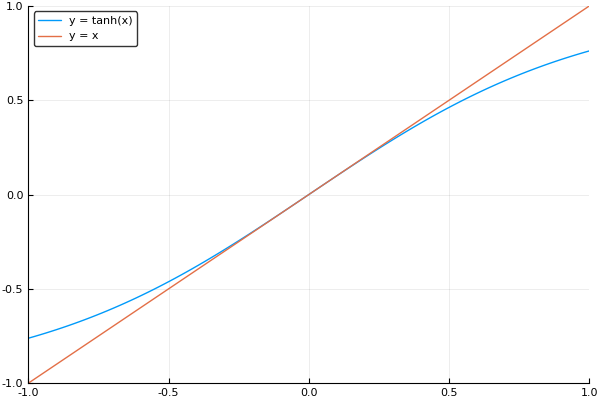

In [2]:
x = linspace(-1, 1, 100)
plot(tanh, x, label="y = tanh(x)")
plot!(x, x, label="y = x")

すなわち, 価格が$\xi(t)$と$\zeta(t)$の2つの確率的な源泉をもとにして変動することを表す. 時刻$t$での価格変動幅が小さい, つまり$x(t)$が小さい時には$t+1$期での価格変動幅は主に$\zeta(t)$により支配され, $x(t)$が大きいときには主に$\xi(t)$により掛け算の形で支配されることを示す. このシミュレーション結果を図\ref{map5}及び図\ref{map5hist}に示す.

In [3]:
loops = 1000
A = 2
h = 0.01
x = Vector{Float64}(loops)
x[1] = 0
for l in 2:loops
    x[l] = tanh(A * (2 * rand() - 1) * x[l-1] + h * (2 * rand() - 1))
end


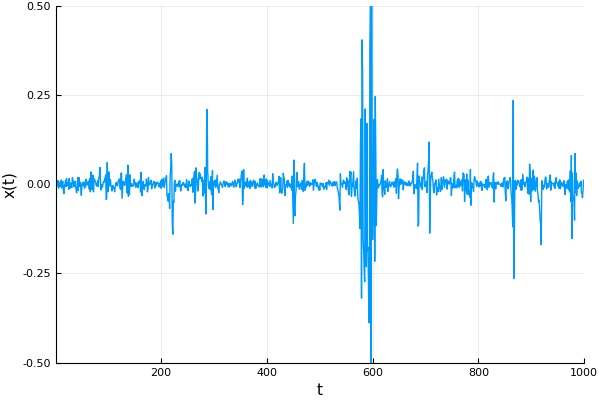

In [4]:
plot(x, xlabel="t", ylabel="x(t)", label="", ylim=(-0.5, 0.5))

In [5]:
cdf_factory = x -> t -> log(sum(x .> exp(t)))

(::#1) (generic function with 1 method)

In [6]:
plot(linspace(-10, 0, 1000), cdf_factory(x))

PyCall.PyError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, C_NULL)) <type 'exceptions.ValueError'>
ValueError(u'Axis limits cannot be NaN or Inf',)
  File "/Users/neon/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 3225, in set_ylim
    bottom = self._validate_converted_limits(bottom, self.convert_yunits)
  File "/Users/neon/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 2836, in _validate_converted_limits
    raise ValueError("Axis limits cannot be NaN or Inf")
[39m


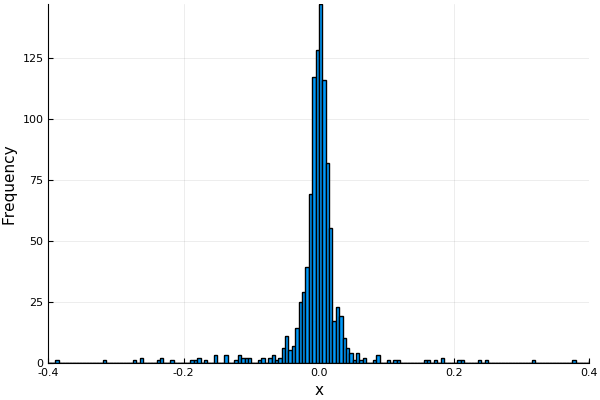

In [7]:
histogram(x, label="", xlabel="x", ylabel="Frequency", xlim=(-0.4, 0.4))

In [8]:
kurtosis(x)

50.61016636528167

ここで, [4] のモデルの妥当性は N が十分大きいことにあったことを考えると, 全エージェントの行動が既知であるという仮定を外した際でもモデルが”Stylized Fact”に対する説明力を持っているか について検証する必要が出てくると考えた.

## 検証方法

モデルのエージェント間に, 相互作用が行われるかどうかの変数を導入し(0=作用しない, 1=作用する)　"Stylized Fact"の創発を示す.

1. 各エージェントは他の数人のエージェントと時間不変のつながりを持つ.

2. 各エージェント $i$ が $t + 1$ 期での行動 $\sigma_i(t + 1)$ を決める際, つながりを持つエージェントの情報のみを
参考にする.

$I_i(t) = \cfrac{1}{|G_i|} \sum_{j \in G_i} A_{ij}(t) \sigma_j(t) + h_i(t)$

ただし,　$G_i$はiとつながりを持つエージェントの集合であり, $|G_i|$はその要素数を表す.
すなわち, つながりを持つエージェントのみの投資行動情報を意思決定に関与させることを表す. ここで繋がりは双方向だと仮定し, $j \in G_i \Rightarrow i \in G_j$とする.

前節では [4] のモデルを拡張したが, エージェントの繋がりをどのように決めるかに恣意性がある. そこでシ
ミュレーションを行うにあたって, 繋がりを以下の 2 つの方法で構築する. 

1. ランダムに各エージェントが自分を除いて n 人と繋がりを持つ.
2. 各エージェントを円周上に均等に並べ, 自分を除いて一番近いエージェント n 人とつながりを持つ.

構築したネットワークをもとに, PC の性能とプログラム実行速度を鑑みて以下のパラメーターで 500 期間シミュレーションを行う.


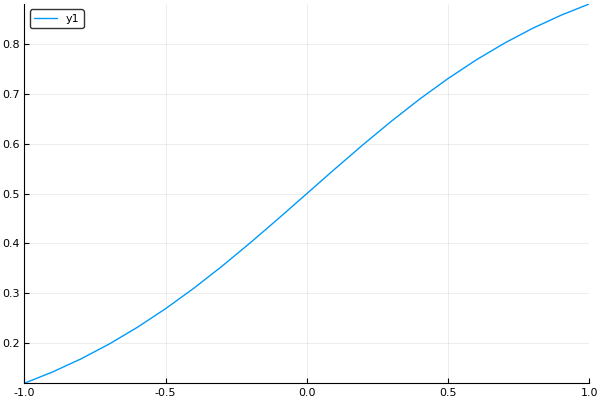

In [5]:
plot(-1:0.1:1, v -> f(-2 * v))

In [6]:
function time_series(N, h0, A0, a, loops, nodes::BitArray=trues(N, N))
    A = zeros(N, N)
    #I = Vector{Float64}(N)
    c = Vector{Int}(N)
    h = Vector{Float64}(N)
    x = Vector{Float64}(loops)
    sigma = zeros(Int, N)
    x[1] = mean(sigma)
    for l in 2:loops
        xi = 2 * rand() - 1
        for i in 1:N
            c[i] = 0
            h[i] = h0 * (2 * rand() - 1)
            for j in 1:N
                if !nodes[i, j] || i == j
                    continue
                end
                c[i] += 1
                A[i, j] = A0 * xi + a * (2 * rand() - 1)
            end
        end
        for i in 1:N
            if c[i] == 0
                c[i] = 1
            end
        end
        #I = A * sigma ./ N + h
        for i in 1:N
            sigma[i] = rand() < f(A[i, :]' * sigma * (-2) / c[i] + h[i]) ? 1 : -1
            #sigma[i] = rand() < f(-2 * I[i]) ? 1 : -1
        end
        x[l] = mean(sigma)
    end
    return x
end

time_series (generic function with 2 methods)

In [7]:
function all_connected_network(N)
    nodes = trues(N, N)
    for i in 1:N
        nodes[i, i] = false
    end
    return nodes
end

all_connected_network (generic function with 1 method)

In [8]:
function random_network(N, avr::Int)
    nodes = falses(N, N)
    for i in 1:N
        targets = rand(1:N, avr)
        for j in targets
            if i == j
                continue
            end
            nodes[i, j] = true
            nodes[j, i] = true
        end
    end
    return nodes
end

random_network (generic function with 1 method)

In [74]:
random_network(10, 6)

10×10 BitArray{2}:
 false   true   true  false   true   true   true  false  false   true
  true  false   true   true   true   true  false   true  false   true
  true   true  false   true   true   true  false  false  false   true
 false   true   true  false   true   true   true  false   true   true
  true   true   true   true  false   true  false   true   true   true
  true   true   true   true   true  false   true   true   true  false
  true  false  false   true  false   true  false   true   true   true
 false   true  false  false   true   true   true  false   true   true
 false  false  false   true   true   true   true   true  false   true
  true   true   true   true   true  false   true   true   true  false

In [9]:
function centered_network(N, num::Int)
    nodes = falses(N, N)
    nodes[:, 1:num] .= true
    nodes[1:num, :] .= true
    for i in 1:N
        nodes[i, i] = false
    end
    return nodes
end

centered_network (generic function with 1 method)

In [10]:
function neighborhood_network(N, avr::Int)
    nodes = falses(N, N)
    for i in 1:N
        for d in 1:Int(floor(avr/2))
            if i + d > N
                nodes[i, i+d-N] = true
            else
                nodes[i, i+d] = true
            end
            if i - d < 1
                nodes[i, i-d+N] = true
            else
                nodes[i, i-d] = true
            end
        end
    end
    return nodes
end

neighborhood_network (generic function with 1 method)

In [11]:
function small_world_network(N, avr::Int, p::Float64)
    nodes = neighborhood_network(N, avr)
    for i in 1:N
        for j in i:N
            if i == j || !nodes[i, j]
                continue
            end
            candidates = collect(Iterators.filter(l -> !nodes[i, l] && i < l && l !== j, 1:N))
            if length(candidates) == 0
                continue
            end
            if rand() < p
                k = rand(candidates)
                nodes[i, j] = false
                nodes[i, k] = true
            end
        end
    end
    for i in 1:N
        for j in i:N
            if i == j
                continue
            end
            nodes[j, i] = nodes[i, j]
        end
    end
    return nodes
end

small_world_network (generic function with 1 method)

In [12]:
small_world_network(10, 10, 1.)

10×10 BitArray{2}:
 false   true   true   true   true   true   true   true   true   true
  true  false   true   true   true   true   true   true   true   true
  true   true  false   true   true   true   true   true   true   true
  true   true   true  false   true   true   true   true   true   true
  true   true   true   true  false   true   true   true   true   true
  true   true   true   true   true  false   true   true   true   true
  true   true   true   true   true   true  false   true   true   true
  true   true   true   true   true   true   true  false   true   true
  true   true   true   true   true   true   true   true  false   true
  true   true   true   true   true   true   true   true   true  false

In [13]:
function simulate(N, h0, A0, a, loops, network=:All; avr=2, p=0.5, num=1)
    if network === :All
        nodes = all_connected_network(N)
    elseif network === :Random
        nodes = random_network(N, avr)
    elseif network === :SmallWorld
        nodes = small_world_network(N, avr, p)
    elseif network === :Neighborhood
        nodes = neighborhood_network(N, avr)
    elseif network === :Centered
        nodes = centered_network(N, num)
    end
    x = time_series(N, h0, A0, a, loops, nodes)
    p = plot(x)
    h = histogram(x)
    return x, p, h, nodes
end

simulate (generic function with 2 methods)

In [14]:
N = 40
h0 = 0.01
A0 = 2
a = 4
loops = 100

100

In [15]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All)

([0.0, 0.2, 0.35, -0.15, -0.15, 0.2, -0.1, 0.0, 0.0, -0.1  …  0.2, 0.15, 0.35, 0.1, 0.55, 0.05, 0.0, -0.05, -0.05, -0.35], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


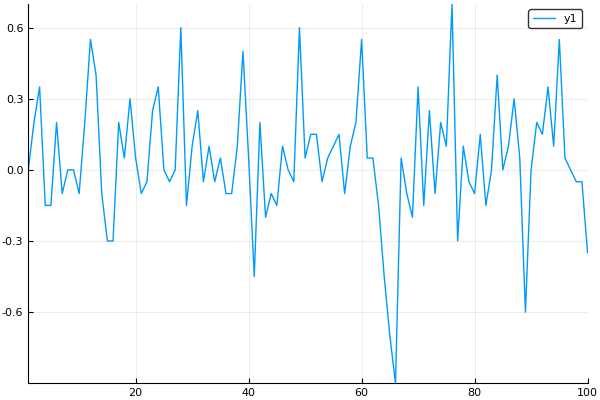

In [16]:
p


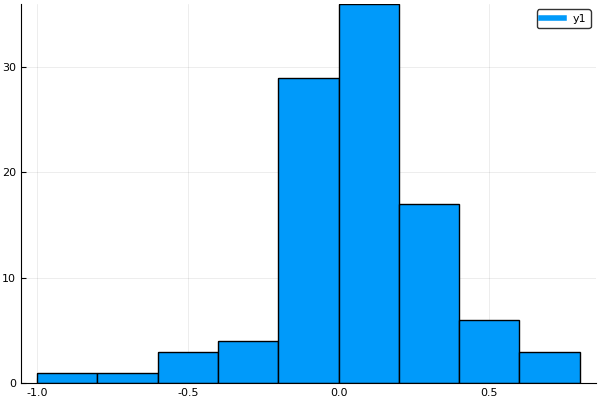

In [17]:
h

In [18]:
kurtosis(x)

1.7631298984181


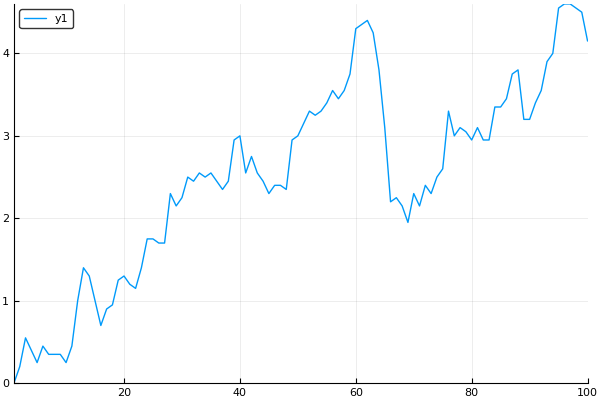

In [19]:
plot(cumsum(x))

## Simulation when N = 4000

In [27]:
N = 4000
h0 = 0.01
A0 = 2
a = 4.0
loops = 500

500

In [28]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All)

([0.0, 0.03, -0.008, 0.0285, -0.0105, 0.0, -0.0385, 0.015, 0.0045, -0.0015  …  0.0055, -0.0165, 0.014, 0.019, 0.004, 0.0355, 0.0305, -0.0285, -0.0005, 0.061], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


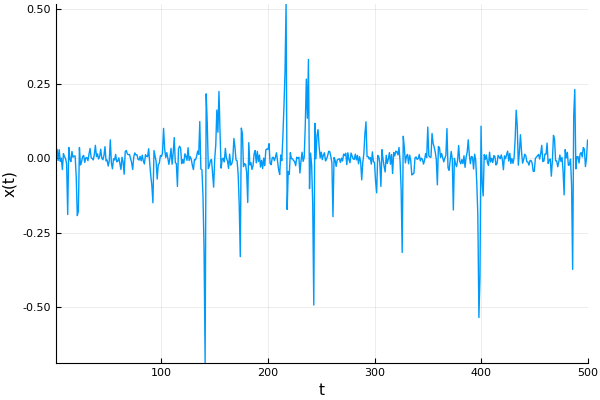

In [29]:
plot(x, label="", xlabel="t", ylabel="x(t)")


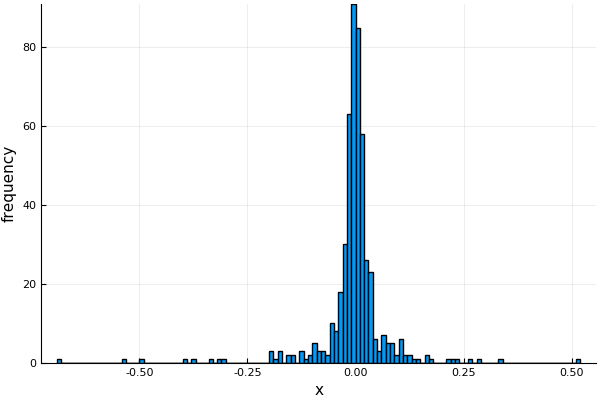

In [30]:
histogram(x, label="", xlabel="x", ylabel="frequency")

## Simulation when N = 25

In [31]:
N = 25
h0 = 0.01
A0 = 2
a = 4.0
loops = 500

500

In [32]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All)

([0.0, 0.04, 0.28, -0.12, 0.28, 0.04, 0.04, -0.12, 0.12, 0.28  …  0.12, -0.28, 0.12, -0.36, 0.2, 0.84, -0.2, -0.04, -0.12, -0.04], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


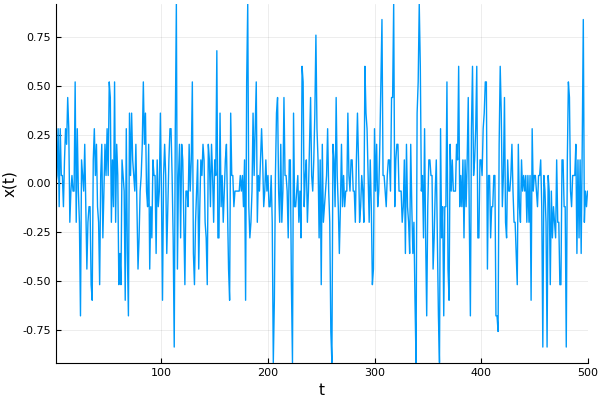

In [33]:
plot(x, label="", xlabel="t", ylabel="x(t)")


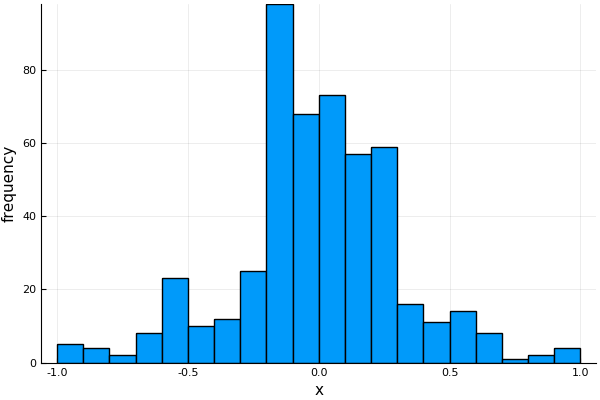

In [34]:
histogram(x, label="", xlabel="x", ylabel="frequency")

## Simulation when N = 2000

In [35]:
N = 2000
h0 = 0
A0 = 2
a = 4.0
loops = 1000

1000

In [36]:
x, p, h, nodes = simulate(N, h0, A0, a, loops)

([0.0, 0.011, -0.074, -0.012, 0.01, -0.024, 0.007, 0.018, -0.008, 0.009  …  -0.016, -0.03, 0.011, -0.031, 0.079, 0.354, -0.121, 0.017, 0.03, 0.005], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


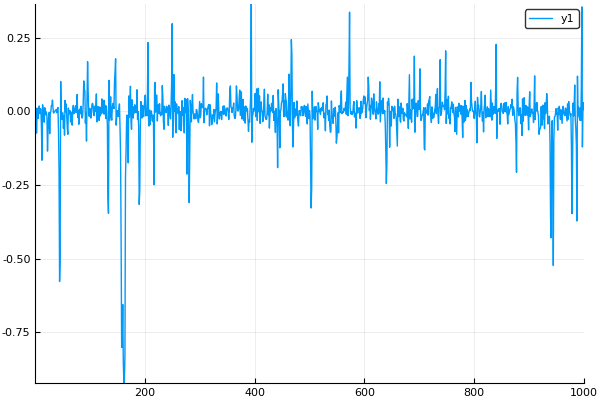

In [37]:
p


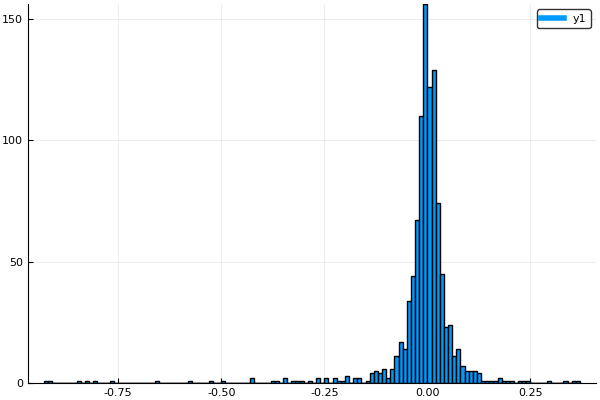

In [38]:
h

## Simulation when N = 4000

In [39]:
N = 4000
h0 = 0
A0 = 2
a = 4.0
loops = 500

500

In [40]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All)

([0.0, -0.0175, -0.079, 0.014, 0.003, 0.0005, 0.0285, 0.032, 0.0905, 0.0135  …  0.0355, -0.015, 0.0135, 0.024, -0.005, 0.0065, 0.017, -0.013, 0.061, -0.0315], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


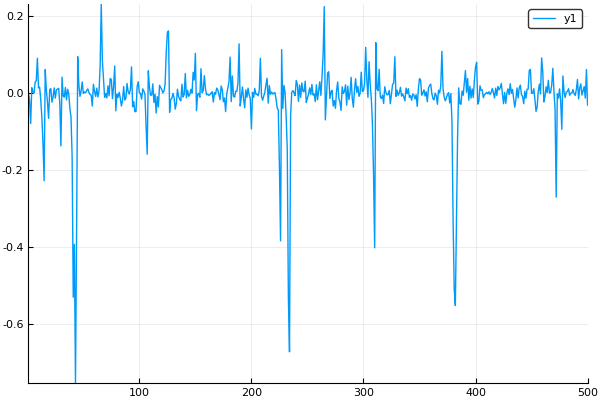

In [41]:
p

## Simulation when N = 1000

In [42]:
N = 1000
h0 = 0.01
A0 = 2
a = 4.0
loops = 500

500

In [43]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All)

([0.0, 0.02, -0.03, 0.0, 0.046, 0.026, -0.022, -0.154, -0.078, -0.386  …  -0.026, -0.008, 0.204, -0.086, -0.252, -0.396, 0.106, 0.028, -0.014, -0.058], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


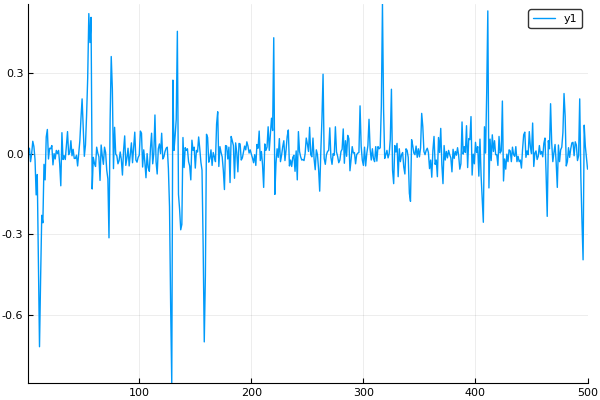

In [44]:
p


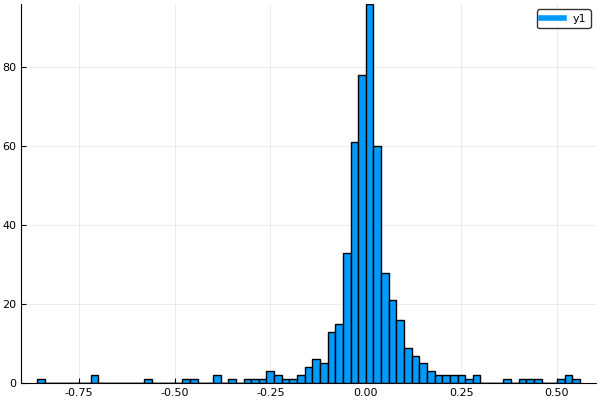

In [45]:
h

In [46]:
kurtosis(x)

13.830202753718012

## Nodes

In [147]:
N = 500
h0 = 0.01
A0 = 2
a = 4.0
loops = 500

500

In [148]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All)

([0.0, 0.004, 0.032, 0.048, 0.112, 0.008, -0.008, -0.064, 0.016, -0.004  …  -0.028, 0.052, 0.052, -0.024, -0.008, 0.0, -0.004, -0.076, 0.048, -0.06], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


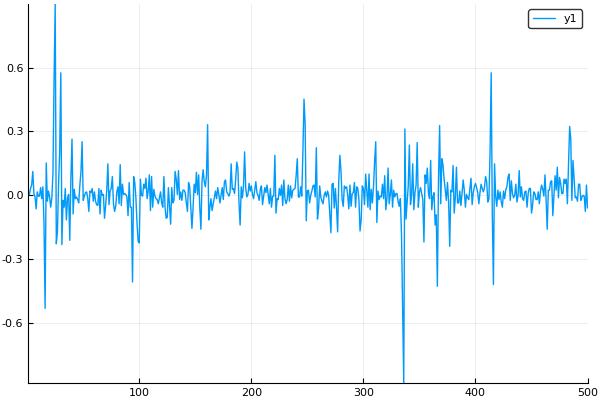

In [149]:
p


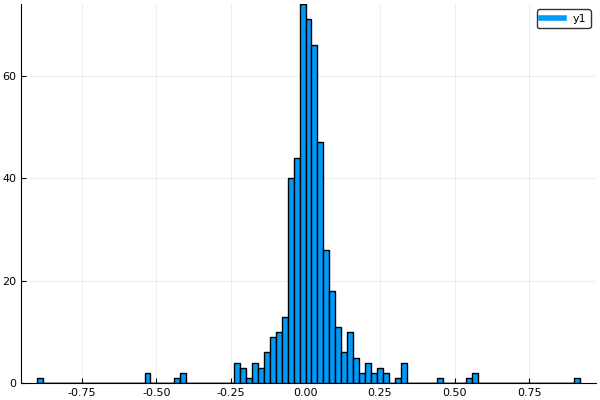

In [151]:
h

In [152]:
kurtosis(x)

16.63167569979757

In [96]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :Centered, num=150)

([0.0, 0.03, 0.032, -0.05, 0.002, -0.062, 0.012, -0.166, 0.004, 0.03  …  0.036, -0.05, 0.132, 0.002, 0.01, 0.014, 0.002, 0.012, -0.246, -0.368], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false false; true true … false false])


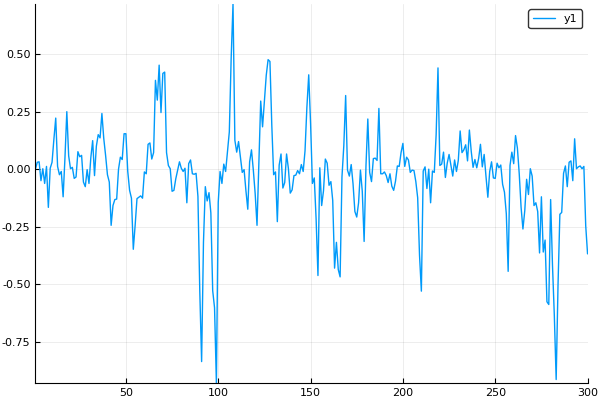

In [97]:
p


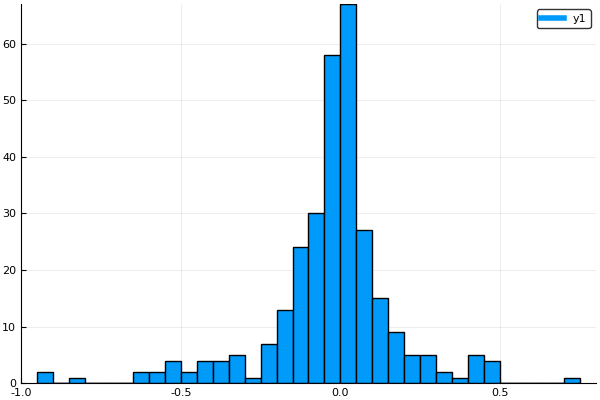

In [98]:
h

In [260]:
avrs = [1, 2, 5, 10, 20, 50, 100, 200, 500]
ls = 20
kurtoses2 = Matrix{Float64}(ls, length(avrs))
real_avrs = []
for (i, avr) in enumerate(avrs)
    for l in 1:ls
        x, p, h, nodes = simulate(N, h0, A0, a, loops, :Neighborhood, avr=avr)
        kurtoses2[l, i] = kurtosis(x)
    end
end

In [261]:
xs = []
for avr in avrs
    for l in 1:ls
        push!(xs, avr)
    end
end
ys = vcat(kurtoses2...)
print()


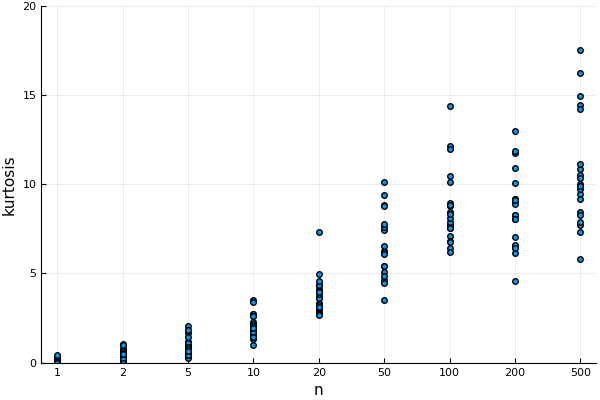

In [262]:
g3 = scatter(map(string, xs), ys, labels="", xlabel="n", ylabel="kurtosis", ylim=(0, 20))


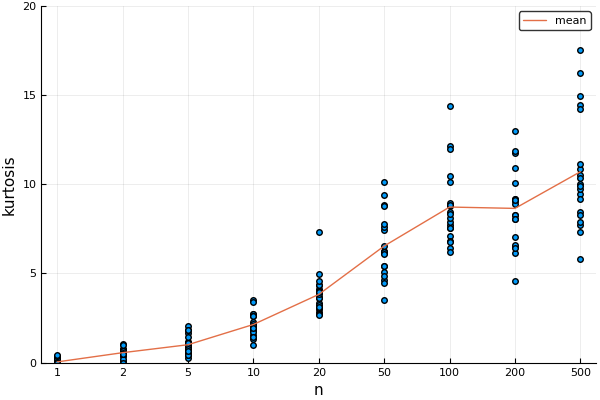

In [263]:
plot!(g3, map(string, avrs), vec(mean(kurtoses2, 1)), label="mean")

In [268]:
nums = [1, 2, 5, 10, 20, 50, 100, 200, 500]
ls = 20
kurtoses3 = Matrix{Float64}(ls, length(nums))
real_avrs = []
for (i, num) in enumerate(nums)
    for l in 1:ls
        x, p, h, nodes = simulate(N, h0, A0, a, loops, :Centered, num=num)
        kurtoses3[l, i] = kurtosis(x)
    end
end

In [269]:
xs = []
for avr in avrs
    for l in 1:ls
        push!(xs, avr)
    end
end
ys = vcat(kurtoses3...)
print()


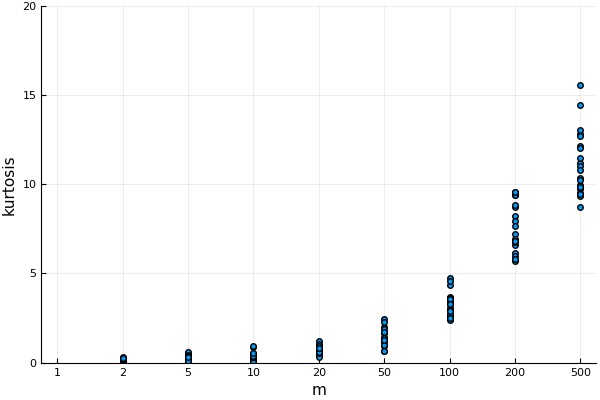

In [273]:
g5 = scatter(map(string, xs), ys, labels="", xlabel="m", ylabel="kurtosis", ylim=(0, 20))


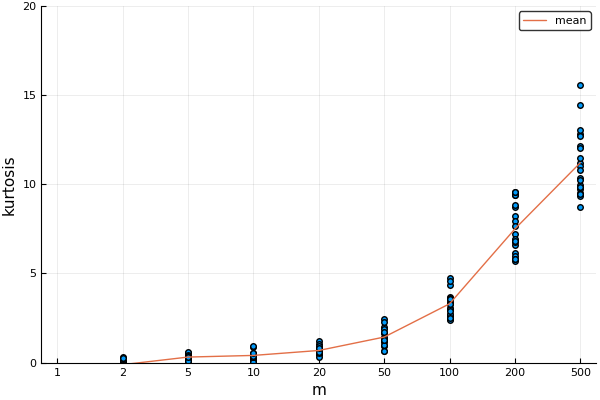

In [274]:
plot!(g5, map(string, nums), vec(mean(kurtoses3, 1)), label="mean")

In [220]:
avrs = [1, 2, 5, 10, 20, 50, 100, 200, 500]
ls = 20
kurtoses = Matrix{Float64}(ls, length(avrs))
real_avrs = []
for (i, avr) in enumerate(avrs)
    for l in 1:ls
        x, p, h, nodes = simulate(N, h0, A0, a, loops, :Random, avr=avr)
        kurtoses[l, i] = kurtosis(x)
    end
end

In [221]:
kurtoses

20×9 Array{Float64,2}:
 1.05256   0.965102   1.66938   3.38924  …  13.2732    8.51536   7.76168
 0.199774  1.92655    2.92176   5.32624     12.3939   14.4767   12.342  
 0.319589  0.861676   3.62685   7.64658     14.0154    9.98025  11.2149 
 1.1056    1.04397   11.588    12.9307      10.3705    9.51985   6.15555
 0.483751  1.14776    7.99597   7.05763     13.8941   15.4937   12.0397 
 0.619092  1.57528    2.38237   3.64643  …  12.5652    8.66624  11.9235 
 0.65215   1.5952     4.66299  12.2001      12.0618   11.7964   11.1562 
 1.1829    0.742014   3.80646   7.38842     10.9795   10.6257   11.5792 
 1.20511   1.0929     2.62122   8.95269     10.8414    9.93248   9.2002 
 0.858146  0.465175   4.31721   3.97001     15.065    12.254     8.36331
 0.666947  3.37559    1.87677   7.82195  …  11.7175    7.612    11.7276 
 0.959988  1.09208    2.185     7.99138     10.051    11.8007   15.016  
 0.113533  0.774336   2.91181   6.03617      7.44338   9.21009   8.61567
 0.418124  2.14291    3.2177

In [223]:
xs = []
for avr in avrs
    for l in 1:ls
        push!(xs, avr)
    end
end
ys = vcat(kurtoses...)
print()


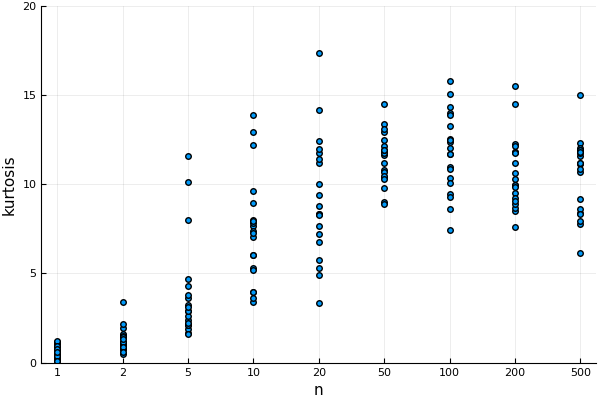

In [258]:
g1 = scatter(map(string, xs), ys, labels="", xlabel="n", ylabel="kurtosis", ylim=(0, 20))


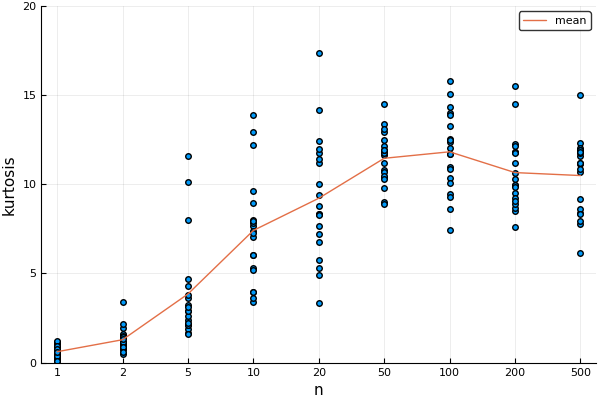

In [259]:
plot!(g1, map(string, avrs), vec(mean(kurtoses, 1)), label="mean")

In [192]:
avrs2 = [2, 10, 500]
xs = []
for avr in avrs2
    x, p, h, nodes = simulate(N, h0, A0, a, loops, :Random, avr=avr)
    push!(xs, x)
end


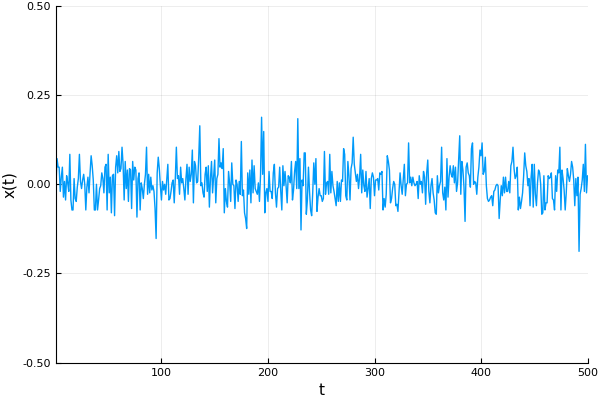

In [210]:
p1 = plot(xs[1], ylim=(-0.5, 0.5), ylabel="x(t)", xlabel="t", label="")


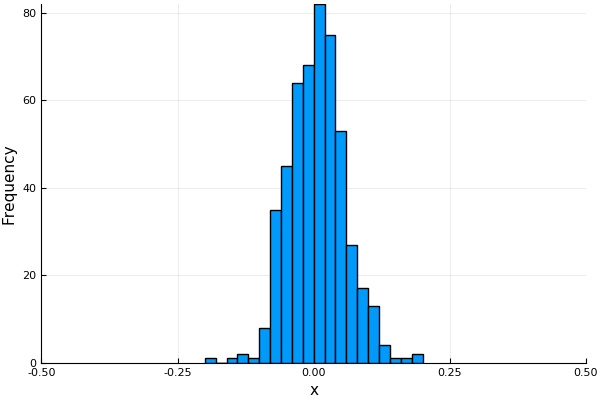

In [211]:
p2 = histogram(xs[1], ylabel="Frequency", xlabel="x", label="", xlim=(-0.5, 0.5))


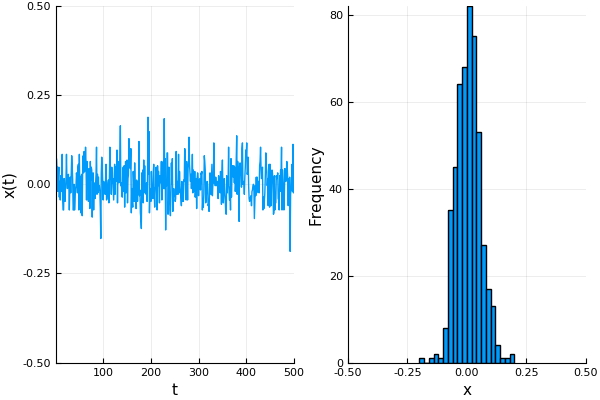

In [212]:
plot(p1, p2, layout=(1, 2))

In [205]:
kurtosis(xs[1])

0.6505534684462719


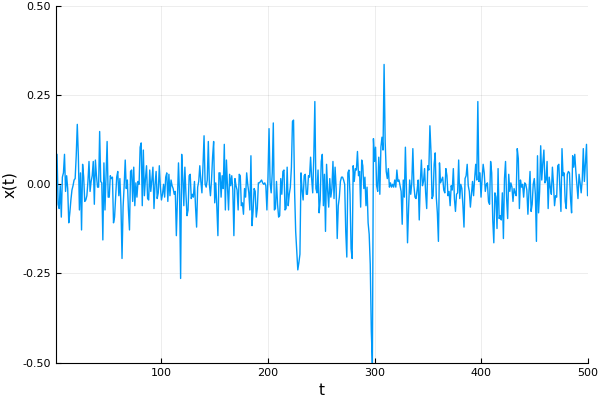

In [213]:
p3 = plot(xs[2], ylim=(-0.5, 0.5), ylabel="x(t)", xlabel="t", label="")


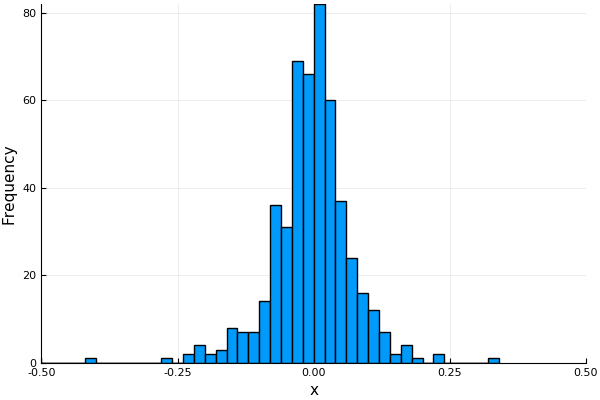

In [214]:
p4 = histogram(xs[2], ylabel="Frequency", xlabel="x", label="", xlim=(-0.5, 0.5))


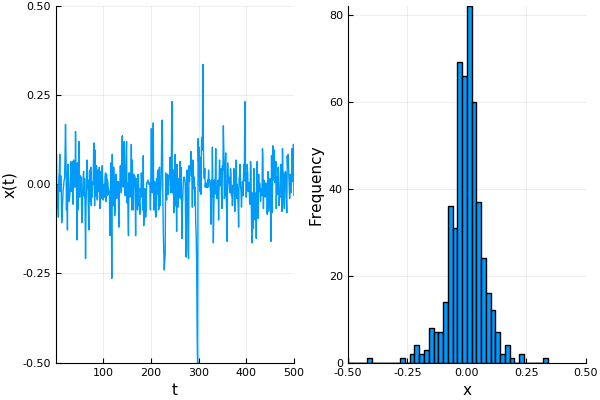

In [215]:
plot(p3, p4, layout=(1, 2))

In [206]:
kurtosis(xs[2])

6.49825731288856


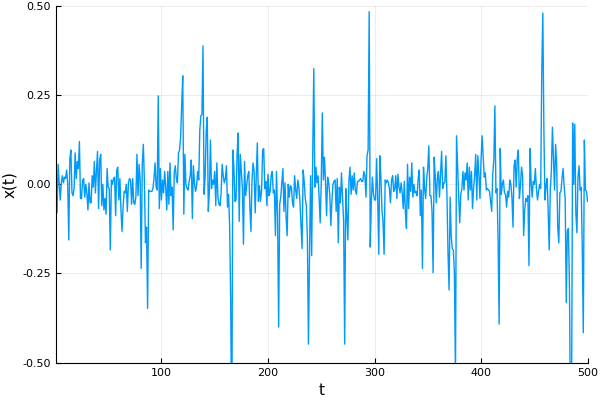

In [216]:
p5 = plot(xs[3], ylim=(-0.5, 0.5), ylabel="x(t)", xlabel="t", label="")


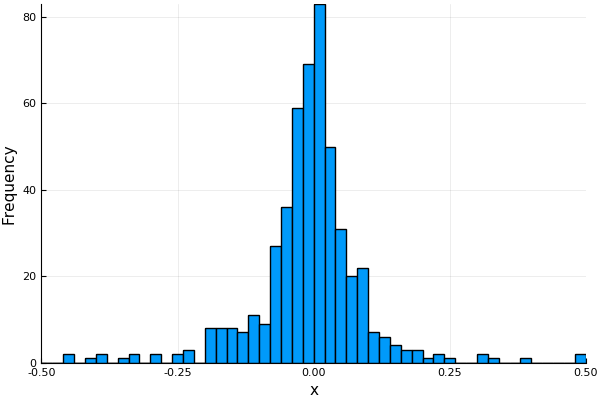

In [217]:
p6 = histogram(xs[3], ylabel="Frequency", xlabel="x", label="", xlim=(-0.5, 0.5))


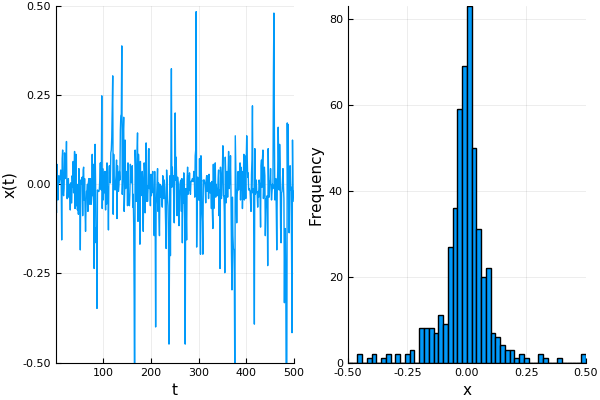

In [218]:
plot(p5, p6, layout=(1, 2))

In [207]:
kurtosis(xs[3])

10.03825249708337

In [ ]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :Centered, num=100)

In [ ]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :Centered, num=Int(N//2))

In [63]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :SmallWorld, avr=avr, p=1.)

([0.0, 0.0, 0.02, 0.03, 0.03, 0.07, 0.12, -0.1, 0.04, 0.03  …  -0.1, -0.01, -0.43, 0.0, -0.15, -0.21, 0.15, -0.18, 0.0, -0.29], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false false … false false; false false … false false; … ; false false … false true; false false … true false])


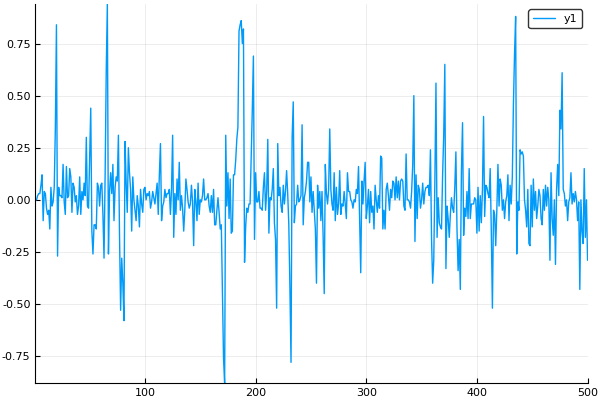

In [64]:
p

In [65]:
x, p, h, nodes = simulate(N, h0, A0, a, loops, :All, avr=avr, p=beta)

([0.0, -0.11, -0.22, 0.16, 0.14, 0.36, 0.72, -0.26, -0.39, 0.11  …  -0.11, -0.23, -0.19, 0.04, -0.11, -0.03, -0.26, 0.12, 0.21, 0.13], Plot{Plots.PyPlotBackend() n=1}, Plot{Plots.PyPlotBackend() n=1}, Bool[false true … true true; true false … true true; … ; true true … false true; true true … true false])


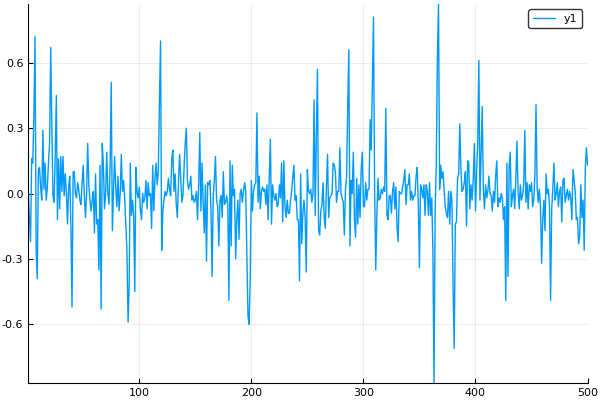

In [66]:
p

In [67]:
kurtosis(x)

5.0205497894243205


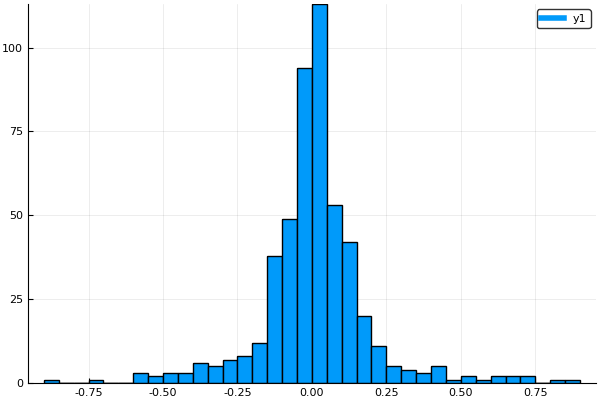

In [68]:
histogram(x)